In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/california-housing-prices/housing.csv


In [2]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
import matplotlib.pyplot as plt

In [6]:
num_data = data.select_dtypes(include=np.number)

In [7]:
print(num_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

(array([ 11.,  38.,  99., 232., 273., 218., 176., 104.,  93.,  58.,  42.,
         35.,  24.,  10.,  17.,   8.,   7.,   4.,   2.,   1.,   1.,   2.,
          1.,   0.,   2.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.        ,  58903.33333333,  82906.66666667, 106910.        ,
        130913.33333333, 154916.66666667, 178920.        , 202923.33333333,
        226926.66666667, 250930.        , 274933.33333333, 298936.66666667,
        322940.        , 346943.33333333, 370946.66666667, 394950.        ,
        418953.33333333, 442956.66666667, 466960.        , 490963.33333333,
        514966.66666667, 538970.        , 562973.33333333, 586976.66666667,
        610980.        , 634983.33333333, 658986.66666667, 682990.        ,
        706993.33333333, 730996.66666667, 755000.        ]),
 <BarContainer object of 30 artists>)

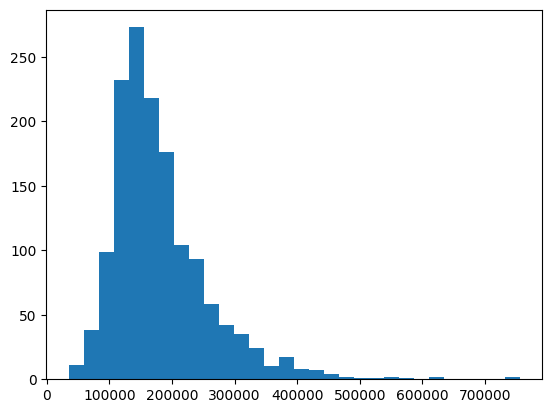

In [8]:
plt.hist(num_data["SalePrice"], bins = 30)

In [9]:
print(data["Condition1"].value_counts())

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64


In [10]:
print(data_norm["SalePrice"].mean())
print(data_norm["SalePrice"].std())

NameError: name 'data_norm' is not defined

In [ ]:
data_norm = data[data["Condition1"]=="Norm"]
data_feedr = data[data["Condition1"]=="Feedr"]
data_Artery = data[data["Condition1"]=="Artery"]
data_RRAn = data[data["Condition1"]=="RRAn"]
data_PosN = data[data["Condition1"]=="PosN"]
#print(data_norm["SalePrice"].mean, data_norm["SalePrice"].std())
#print(data_feedr["SalePrice"].mean, data_feedr["SalePrice"].std())
#print(data_Artery["SalePrice"].mean, data_Artery["SalePrice"].std())
#print(data_RRAn["SalePrice"].mean, data_RRAn["SalePrice"].std())
#plt.hist(data_norm["SalePrice"], bins = 50)

In [ ]:
print(data_norm["SalePrice"].mean(),data_norm["SalePrice"].std())
print(data_feedr["SalePrice"].mean(),data_feedr["SalePrice"].std())
print(data_Artery["SalePrice"].mean(), data_Artery["SalePrice"].std())
print(data_RRAn["SalePrice"].mean(), data_RRAn["SalePrice"].std())


In [ ]:
#df = data["LotArea", "Utilities", ]

In [ ]:
data["Neighborhood"].values

In [ ]:
data["Neighborhood"].values.unique()

for n in data["Neighborhood"].values:
    
    #tmp = data[data["Neighborhood"]==n]
    #print(n, " : ", tmp["SalePrice"].mean(), "+-", tmp["SalePrice"].std())

In [ ]:
df = data.copy()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
num_attribs = df.select_dtypes(include=np.number)
num_attribs = num_attribs.drop({'Id','MSSubClass','SalePrice'}, axis = 1) #Variable à prédire, MSSubClass correspond à des classes notées par 20,30,50... et Id sert à les identifier (à priori inutile ici)
#num_data = df[i_num_data]

cat_bin_attribs = df[list(("MSSubClass","MSZoning","Street","Alley","LotConfig","Neighborhood", "Condition1", "Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl", "Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","Electrical","Functional","GarageType","MiscFeature","SaleType","SaleCondition"))]
cat_scale_attribs = df[list(("LotShape","LandContour","Utilities","LandSlope","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","HeatingQC","KitchenQual","FireplaceQu","GarageFinish","GarageQual","GarageCond","PavedDrive","PoolQC","Fence"))]

will_drop = (("MSSubClass","MSZoning", "Street", "Alley", "LotConfig","Condition1", "Condition2", "YearRemodAdd", "YearBuilt", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "Foundation","BsmtFinSF1", "BsmtFinSF2", "GarageYrBlt", "GarageFinish", "PavedDrive", "MoSold", "YrSold"))
#print(num_data)
#print(cat_bin_attribs)
#print(cat_scale_attribs)

On vérifie qu'il n'y a pas de doublons

In [ ]:
print(any(col in num_attribs for col in cat_bin_attribs))
print(any(col in num_attribs for col in cat_scale_attribs))
print(any(col in cat_scale_attribs for col in cat_bin_attribs))
print(set(num_attribs) & set(cat_bin_attribs))
print("Nombre d'attributs (en retirant la variable à prédire et l'identifiant) :",len(cat_bin_attribs.columns) + len(cat_scale_attribs.columns) + len(num_attribs.columns) )

In [ ]:
lot_fr_ix, lot_area_ix, fbath_ix, bs_fbath_ix, hbath_ix, bs_hbath_ix, y_constr_ix, y_renov_ix = num_attribs.columns.get_loc("LotFrontage"), num_attribs.columns.get_loc("LotArea"), num_attribs.columns.get_loc("FullBath"), num_attribs.columns.get_loc("BsmtFullBath"), num_attribs.columns.get_loc("HalfBath"), num_attribs.columns.get_loc("BsmtHalfBath"), num_attribs.columns.get_loc("YearBuilt"), num_attribs.columns.get_loc("YearRemodAdd")

cat_bin_attribs = (df.columns.get_loc("Neighborhood"),df.columns.get_loc("BldgType"),df.columns.get_loc("HouseStyle"),df.columns.get_loc("RoofStyle"),df.columns.get_loc("Heating"),df.columns.get_loc("CentralAir"),df.columns.get_loc("Electrical"),df.columns.get_loc("Functional"),df.columns.get_loc("GarageType"),df.columns.get_loc("MiscFeature"),df.columns.get_loc("SaleType"),df.columns.get_loc("SaleCondition"))
cat_scale_attribs = (df.columns.get_loc("LotShape"), df.columns.get_loc("LandContour"), df.columns.get_loc("Utilities"), df.columns.get_loc("LandSlope"), df.columns.get_loc("ExterQual"), df.columns.get_loc("ExterCond"),df.columns.get_loc("BsmtQual"),df.columns.get_loc("BsmtCond"),df.columns.get_loc("BsmtExposure"),df.columns.get_loc("BsmtFinType1"),df.columns.get_loc("BsmtFinType2"),df.columns.get_loc("HeatingQC"),df.columns.get_loc("KitchenQual"),df.columns.get_loc("FireplaceQu"),df.columns.get_loc("GarageQual"),df.columns.get_loc("GarageCond"),df.columns.get_loc("PoolQC"),df.columns.get_loc("Fence"))

print(num_attribs)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_connected2street = True, add_ratio_fbath = False, add_ratio_hbath = False, add_is_renoved = True):
        self.add_connected2street = add_connected2street
        self.add_ratio_fbath = add_ratio_fbath
        self.add_ratio_hbath = add_ratio_hbath
        self.add_is_renoved = add_is_renoved
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        tmp = np.c_[X]
        if self.add_connected2street == True:
            isconnected2street = X[:,lot_fr_ix] / X[:,lot_area_ix]
            tmp = np.column_stack((tmp, isconnected2street))
        if self.add_ratio_fbath == True:
            denom = X[:, bs_fbath_ix]
            ratio_fbath = np.where(denom != 0, X[:, fbath_ix] / denom, 0)  # 0 si dénominateur est 0
            tmp = np.column_stack((tmp, ratio_fbath))
        if self.add_ratio_hbath == True:
            denom = X[:, bs_hbath_ix]
            ratio_hbath = np.where(denom != 0, X[:, hbath_ix] / denom, 0)  # 0 si dénominateur est 0
            tmp = np.column_stack((tmp, ratio_hbath))
        if self.add_is_renoved == True:
            is_renoved = X[:, y_renov_ix] - X[:, y_constr_ix]
            tmp = np.column_stack((tmp, is_renoved))
        return tmp

In [ ]:
#attr_adder = CombinedAttributesAdder(add_connected2street = True, add_ratio_fbath = True, add_ratio_hbath = True, add_is_renoved = True)
#df_extra_attribs = attr_adder.transform(df.values)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
    
])

cat_scale_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ordinal', OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value =-1)) #maybe à spécifier
    
    
])

full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attribs.columns),
    ("cat_bin_pipeline", cat_bin_pipeline, cat_bin_attribs.columns),
    ("cat_scale_pipeline", cat_scale_pipeline, cat_scale_attribs.columns),
    
])

In [ ]:
df_prepared = full_pipeline.fit_transform(df)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df["SalePrice"])

In [ ]:
some_data = data.iloc[:5, :-1]
some_labels = data.iloc[:5, -1]
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions : ", lin_reg.predict(some_data_prepared))

In [ ]:
print("Valeurs : ", some_labels)

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(df_prepared)
lin_mse = mean_squared_error(df["SalePrice"], housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

surface street 22367.386510090553 / +renoved 22381.481658672645 / AUtres : nul / Rien :22390.380006853156


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_prepared, df["SalePrice"])

In [ ]:
housing_predictions_T = tree_reg.predict(df_prepared)
lin_mse_T = mean_squared_error(df["SalePrice"], housing_predictions_T)
lin_rmse_T = np.sqrt(lin_mse_T)
print(lin_rmse_T)

In [ ]:
from sklearn.model_selection import cross_val_score
scores_T = cross_val_score(tree_reg, df_prepared, df["SalePrice"], scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores_T)
scores_lin = cross_val_score(lin_reg, df_prepared, df["SalePrice"], scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores_lin)

In [ ]:
def display_score(scores):
    print("Scores : ", scores)
    print("Moyenne : ", scores.mean())
    print("Ecart type : ", scores.std())

In [ ]:
display_score(tree_rmse_scores)
display_score(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(df_prepared, df["SalePrice"])
scores_forest = cross_val_score(forest_reg, df_prepared, df["SalePrice"], scoring="neg_mean_squared_error",cv=10)
forest_rmse = np.sqrt(-scores_forest)
print(forest_rmse)

In [ ]:
display_score(forest_rmse)

Exporter le modèle

In [ ]:
import joblib
joblib.dump(forest_reg, "forest_reg_houseP1.pkl")

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [84, 86, 88], 'max_features': [30, 32, 35]},
    {'bootstrap': [False], "n_estimators": [3, 10], 'max_features': [2, 3, 4]},
]
best_forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(best_forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", refit=True)
grid_search.fit(df_prepared, df['SalePrice'])

In [ ]:
grid_search.best_params_
#grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
    {"n_estimators": [84, 86, 88], 'max_features': [30, 32, 35]},
    {'bootstrap': [False], "n_estimators": [3, 10], 'max_features': [2, 3, 4]},
]
best_forest_reg = RandomForestRegressor()
grid_search_rnd = RandomizedSearchCV(best_forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", refit=True)
grid_search_rnd.fit(df_prepared, df['SalePrice'])

In [ ]:

joblib.dump(forest_reg, "forest_reg_houseP_rndsearch.pkl")

In [ ]:
feature_importances = grid_search_rnd.best_estimator_.feature_importances_

In [ ]:
extra_attribs = ["isconnected2street", "add_is_renoved"]
#cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs.columns.tolist() + extra_attribs + cat_bin_attribs.columns.tolist() + cat_scale_attribs.columns.tolist()

In [ ]:
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

data_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")


In [ ]:
X_test = data_test.drop("Id", axis = 1)

In [ ]:


X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)


In [ ]:

output = np.vstack((data_test["Id"], final_predictions))

In [ ]:
print(output)
np.savetxt("submission.csv", output, delimiter=",", header="Id,SalePrice")

df["LotFrontage"] = df["LotFrontage"]/df["LotArea"] #La longueur connectée à la rue dpd de l'aire
df["GoodBath"] = df["FullBath"] / df["BasmtFullBath"]
df["GoodHalfBath"] = df["HalfBath"] / df["BasmtHalfBath"]
df["LastRenov"] = df["YearRemodAdd"] - df["YearBuilt"]
num_cat = {"OverallQual", "OverallCond", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLiveArea", "BsmtFullBath", "BsmtHalfBath", "Kitchen", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"}

df.drop({"MSSubClass","MSZoning", "Street", "Alley", "LotConfig","Condition1", "Condition2", "YearRemodAdd", "YearBuilt", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "MasVnrArea", "Foundation","BsmtFinSF1", "BsmtFinSF2", "GarageYrBlt", "GarageFinish", "PavedDrive", "MoSold", "YrSold", }, axis=1)

se Prices | Version 1from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_bin_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    'selector', DataFrameSelector(cat_bin_attribs),
    ('label_binarizer', LabelBinarizer()),
    
])

cat_scale_pipeline = Pipeline([
    'selector', DataFrameSelector(cat_scale_attribs),
    ('label_encoder', LabelEncoder()),
    
])

full_pipeline = FeatureUnion(transformer_list = [
    ("num_pipeline", num_pipeline),
    ("cat_bin_pipeline", cat_bin_pipeline),
    ("cat_scale_pipeline", cat_scale_pipeline),
    
])

print(df.columns.get_loc("YearBuilt"))

df["LotFrontage"] = df["LotFrontage"]/df["LotArea"] #La longueur connectée à la rue dpd de l'aire
df["GoodBath"] = df["FullBath"] / df["BsmtFullBath"]
df["GoodHalfBath"] = df["HalfBath"] / df["BsmtHalfBath"]
df["LastRenov"] = df["YearRemodAdd"] - df["YearBuilt"]

df["Neighborhood"] = OneHotEncoder().fit_transform(df["Neighborhood"].reshape(-1,1))
df["BldgType"] = OneHotEncoder().fit_transform(df["BldgType"].reshape(-1,1))
df["HouseStyle"] = OneHotEncoder().fit_transform(df["HouseStyle"].reshape(-1,1))
df["RoofStyle"] = OneHotEncoder().fit_transform(df["RoofStyle"].reshape(-1,1))
df["Heating"] = OneHotEncoder().fit_transform(df["Heating"].reshape(-1,1))
df["CentralAir"] = OneHotEncoder().fit_transform(df["CentralAir"].reshape(-1,1))
df["Electrical"] = OneHotEncoder().fit_transform(df["Electrical"].reshape(-1,1))
df["Functional"] = OneHotEncoder().fit_transform(df["Functional"].reshape(-1,1))
df["GarageType"] = OneHotEncoder().fit_transform(df["GarageType"].reshape(-1,1))
df["MiscFeature"] = OneHotEncoder().fit_transform(df["MiscFeature"].reshape(-1,1))
df["SaleType"] = OneHotEncoder().fit_transform(df["SaleType"].reshape(-1,1))
df["SaleCondition"] = OneHotEncoder().fit_transform(df["SaleCondition"].reshape(-1,1))